# Agglomerative Frame Clustering Demo

## Set-up

### Load modules

In [1]:
import os # module for interacting with files and folders
from audio_processing import *
from audio_display import *
from array_manipulation import *
from load_audio import *
from feature_normalize import *
from pca_paths import *
from frame_clustering import *
from segments import *

### Load Audio Files

In [2]:
paths = [r'sound/American-English/Narrative',
        r'sound/American-English/Consonants',
        r'sound/American-English/Vowels',
        r'sound/Non-speech']

out_path = 'sound/out/'

fns,audio_data = load_audio(paths_list=paths, pad=0,nonspeech_dur=0)

narrative_fns,consonants_fns,vowels_fns,nonspeech_fns = fns
narrative_data,consonants_data,vowels_data,nonspeech_data = audio_data

### Normalization from Narrative Data

In [3]:
narr = get_narr(narrative_fns,pad=0)
narr_scaler = get_scaler(narrative_fns)

narr_frames = np.transpose(norm_array_hor(narr,narr_scaler))
print(narr_frames.shape)

narr_pca = PCA(n_components=3).fit(narr_frames)
narr_pcs = narr_pca.transform(narr_frames)
print(f'Explained variance ratio: \n{narr_pca.explained_variance_ratio_}')

(9549, 12)
Explained variance ratio: 
[0.27587196 0.17633553 0.15477887]


In [4]:
clip_dict = {}
path_test_fns = vowels_fns+consonants_fns+nonspeech_fns
for clip_fn in path_test_fns:
  name = clip_fn.split("/")[-1].split(".")[0].title()
  clip_data = process_audio(clip_fn,n_mfcc_list=[12],pad = 0)
  fourier = clip_data["fourier"]
  sr = clip_data["sr"]
  normed_mfcc = norm_array_hor(clip_data["mfcc"]["12"],narr_scaler)
  clip_frames = np.transpose(normed_mfcc)
  clip_pca = narr_pca.transform(clip_frames)
  clip_dict[name] = {"frames":clip_frames,"pca":clip_pca}

print(clip_dict.keys())
print(clip_dict["Bird"].keys())
print(clip_dict["Bird"]['frames'].shape)
print(clip_dict["Bird"]['pca'].shape)

dict_keys(['Bird', 'Bed', 'Bid', 'Above', 'Bayed', 'Good', 'Buy', 'Bud', 'Bead', 'Bough', 'Bad', 'Boy', 'Booed', 'Bode', 'Pod', 'Sigh', 'Shy', 'Fie', 'Rye', 'Die', 'Why', 'Hang', 'Guy', 'Thigh', 'You', 'Thy', 'Gin', 'Vie', 'My', 'Azure', 'Tie', 'High', 'Pie', 'Kite', 'Chin', 'Lie', 'Nigh', 'Zoo', 'Train', 'Water'])
dict_keys(['frames', 'pca'])
(202, 12)
(202, 3)


### Visualize Narrative Data

Text(0.5, 1.0, 'Isometric')

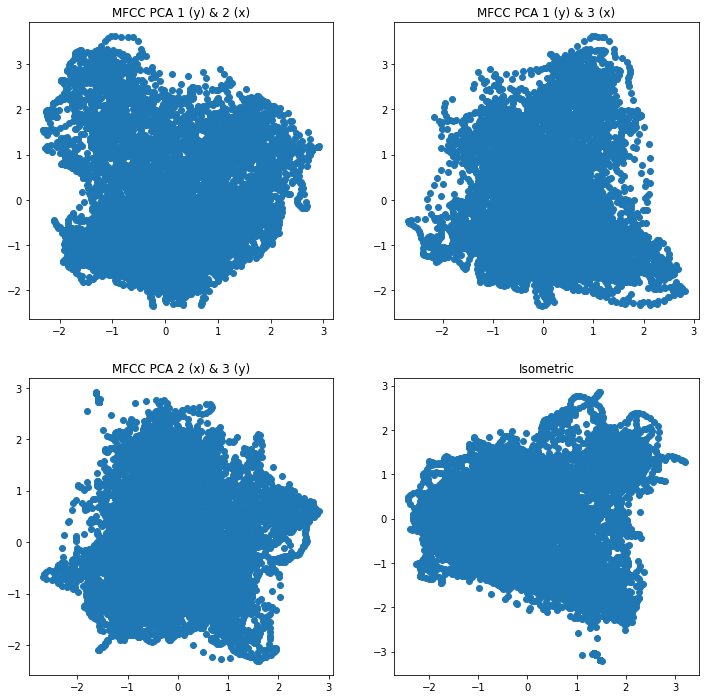

In [5]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

fig, axs = plt.subplots(nrows=2,ncols=2,figsize=(12, 12))

axs[0,0].scatter(narr_pcs[:, 1], narr_pcs[:, 0])
axs[0,0].set_title("MFCC PCA 1 (y) & 2 (x)")

axs[0,1].scatter(narr_pcs[:, 2], narr_pcs[:, 0])
axs[0,1].set_title("MFCC PCA 1 (y) & 3 (x)")

axs[1,0].scatter(narr_pcs[:, 2], narr_pcs[:, 1])
axs[1,0].set_title("MFCC PCA 2 (x) & 3 (y)")

axs[1,1].scatter(0.408*(2*narr_pcs[:, 0]+narr_pcs[:, 1]+narr_pcs[:, 2]), 0.707*(narr_pcs[:, 2]-narr_pcs[:, 1]))
axs[1,1].set_title("Isometric")

## Frame Clustering on Audio Sequence Data

### Clustering on Narrative

Text(0.5, 1.0, 'Isometric')

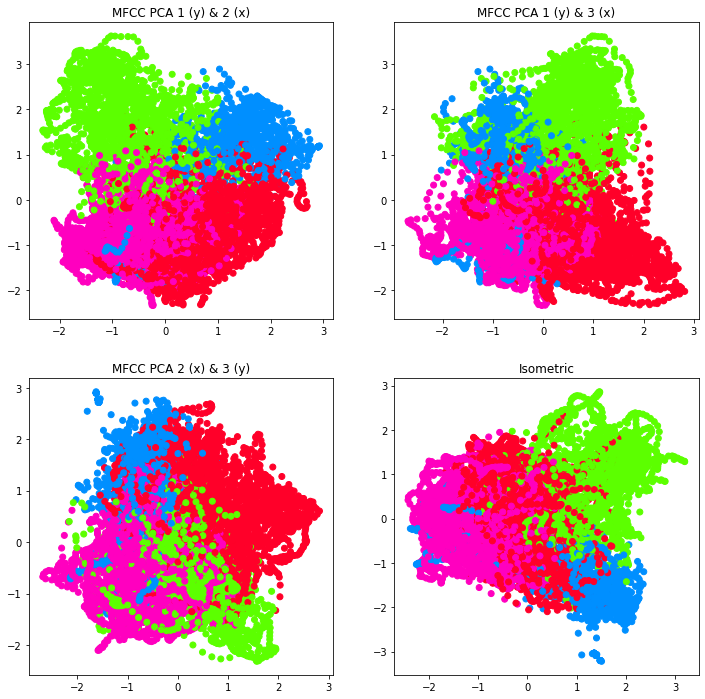

In [6]:
common_params = {"linkage": "complete",
    "distance_threshold": 18,
    "affinity": "manhattan",
    "connectivity": None,
    "compute_full_tree": True,
    "n_clusters": None,
}

narr_clusters = AgglomerativeClustering(**common_params)

y_pred = narr_clusters.fit_predict(narr_frames)

fig, axs = plt.subplots(nrows=2,ncols=2,figsize=(12, 12))
colors = 'gist_rainbow'

axs[0,0].scatter(narr_pcs[:, 1], narr_pcs[:, 0], c=y_pred, cmap = colors)
axs[0,0].set_title("MFCC PCA 1 (y) & 2 (x)")

axs[0,1].scatter(narr_pcs[:, 2], narr_pcs[:, 0], c=y_pred, cmap = colors)
axs[0,1].set_title("MFCC PCA 1 (y) & 3 (x)")

axs[1,0].scatter(narr_pcs[:, 2], narr_pcs[:, 1], c=y_pred, cmap = colors)
axs[1,0].set_title("MFCC PCA 2 (x) & 3 (y)")

axs[1,1].scatter(0.408*(2*narr_pcs[:, 0]+narr_pcs[:, 1]+narr_pcs[:, 2]), 0.707*(narr_pcs[:, 2]-narr_pcs[:, 1]), c=y_pred, cmap = colors)
axs[1,1].set_title("Isometric")

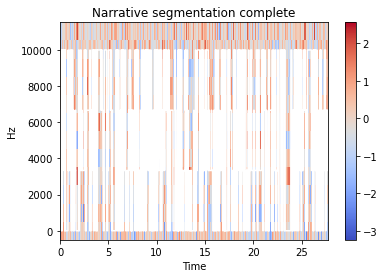

In [7]:
plot_timeseries_on_mfcc(np.transpose(narr_frames),y_pred,sr,scale_ts=1,title=f"Narrative segmentation complete",line_color='white')

### Clustering on Single Words with Narrative

In [8]:
print(list(clip_dict.keys()))
colors = 'gist_rainbow'

['Bird', 'Bed', 'Bid', 'Above', 'Bayed', 'Good', 'Buy', 'Bud', 'Bead', 'Bough', 'Bad', 'Boy', 'Booed', 'Bode', 'Pod', 'Sigh', 'Shy', 'Fie', 'Rye', 'Die', 'Why', 'Hang', 'Guy', 'Thigh', 'You', 'Thy', 'Gin', 'Vie', 'My', 'Azure', 'Tie', 'High', 'Pie', 'Kite', 'Chin', 'Lie', 'Nigh', 'Zoo', 'Train', 'Water']


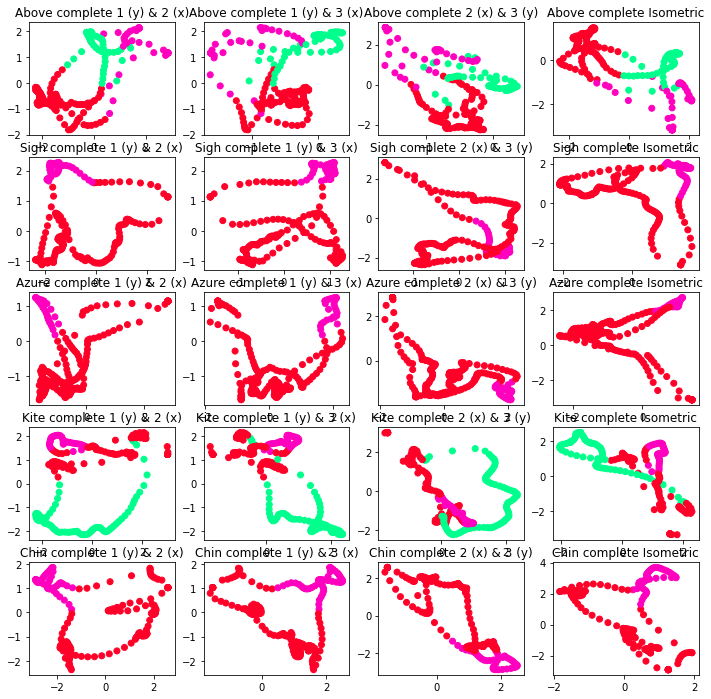

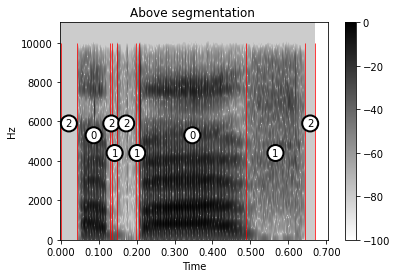

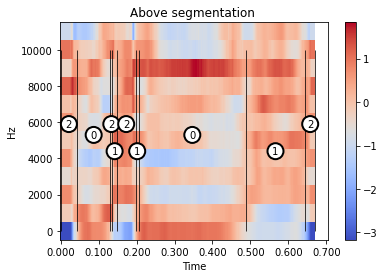

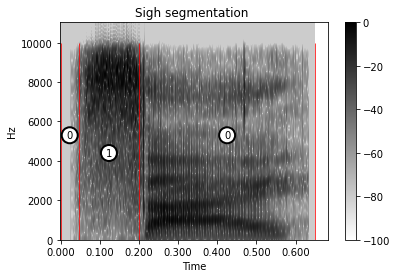

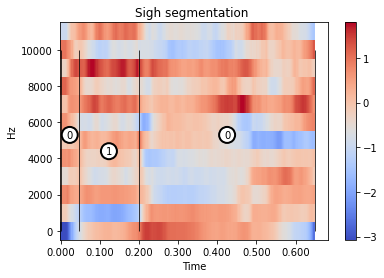

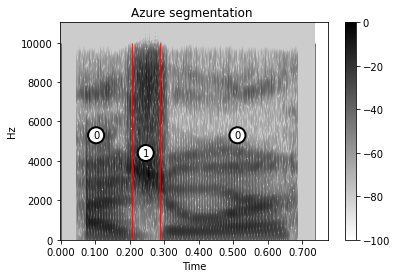

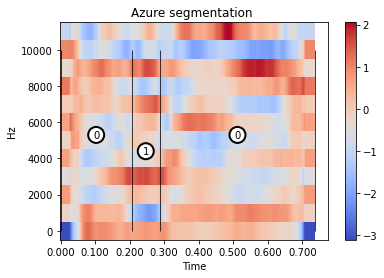

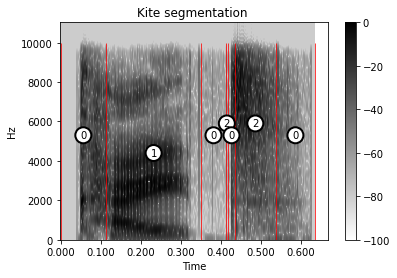

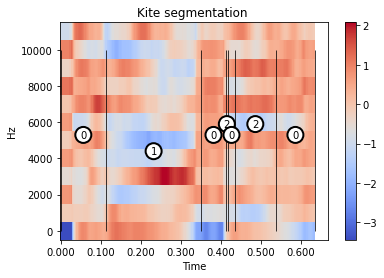

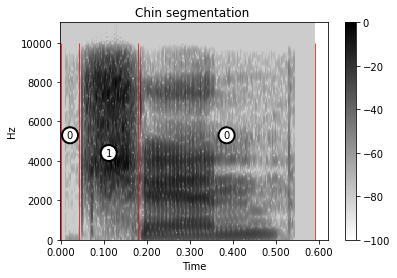

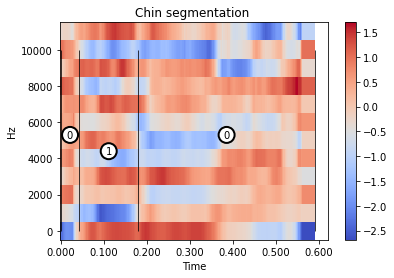

In [9]:
common_params = {
    "connectivity": None,
    "compute_full_tree": True,
    "n_clusters": None
}

res = 3
sr = sr
hop = 2**(9-res)
w = hop/sr

fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(12, 12))

data = [item for sublist in audio_data for item in sublist]

linkage = "complete"
distance_threshold = 20

for i,word in enumerate(['Above', 'Sigh', 'Azure', 'Kite', 'Chin']):

    clip = clip_dict[word]


    clip_len = clip["frames"].shape[0]

    X_combined = np.concatenate([clip["frames"],narr_frames],axis=0)

    X_combined_pca = np.concatenate([clip["pca"],narr_pcs],axis=0)

    
    word_data = next(item for item in data if item["fn"].split("/")[-1].split(".")[0].title() == word)

    agg_clusters_clip = AgglomerativeClustering(linkage = linkage, distance_threshold = distance_threshold, affinity="manhattan", **common_params)
    y_pred_combined = agg_clusters_clip.fit_predict(X_combined)

    y_pred = np.split(y_pred_combined,[clip_len])[0]
    X_pca = np.split(X_combined_pca,[clip_len])[0]

    segmentation = get_intervals(list(y_pred),frame_w=w)

    axs[i,0].scatter(X_pca[:, 1], X_pca[:, 0], c=y_pred, cmap = colors)
    axs[i,0].set_title(f"{word} {linkage} 1 (y) & 2 (x)")

    axs[i,1].scatter(X_pca[:, 2], X_pca[:, 0], c=y_pred, cmap = colors)
    axs[i,1].set_title(f"{word} {linkage} 1 (y) & 3 (x)")

    axs[i,2].scatter(X_pca[:, 2], X_pca[:, 1], c=y_pred, cmap = colors)
    axs[i,2].set_title(f"{word} {linkage} 2 (x) & 3 (y)")

    axs[i,3].scatter(0.408*(2*X_pca[:, 0]+X_pca[:, 1]+X_pca[:, 2]), 0.707*(X_pca[:, 2]-X_pca[:, 1]), c=y_pred, cmap = colors)
    axs[i,3].set_title(f"{word} {linkage} Isometric")

    #plot_timeseries_on_spectrogram(word_data["fourier"],y_pred,sr,scale_ts=1,title=f"{word} segmentation {linkage}",line_color='red')
    #plot_timeseries_on_mfcc(np.transpose(clip_dict[word]['frames']),y_pred,sr,scale_ts=1,title=f"{word} segmentation {linkage}",line_color='black')
    plot_segments_on_spectrogram(word_data["fourier"],segmentation,sr,title=f"{word} segmentation ",line_color='red')
    plot_segments_on_mfcc(np.transpose(clip_dict[word]['frames']),segmentation,sr,title=f"{word} segmentation ",line_color='black')
    #plt.figure(figsize=(12,4))
    #plt.title(f"Hierarchical Clustering Dendrogram for {word}")
    # plot the top three levels of the dendrogram
    #plot_dendrogram(agg_clusters_clip, truncate_mode='lastp', color_threshold=distance_threshold)
    #plt.xlabel("Number of points in node (or index of point if no parenthesis).")

    
